## Завдання на практичну роботу "Основи TensorFlow та Deep Learning":
Виконав студент групи МІТ-31 Черевач Юрій

Завдання:

*Встановлення TensorFlow:*
- Встановіть TensorFlow на вашому комп'ютері або віртуальному середовищі.

*Ознайомлення з TensorFlow:*
- Вивчіть основні концепції TensorFlow, такі як тензори, операції та графи обчислень.
- Створіть тензори різних типів та виконайте над ними операції.

*Побудова моделі для регресії:*
- Використайте згенерований у лабораторній роботі 2 набір даних для задачі регресії, включаючи ознаки та відповідні значення цільової змінної.
- Створіть та скомпілюйте модель нейронної мережі для регресії з використанням TensorFlow.
- Виберіть функцію втрати та оптимізатор для моделі та навчіть її на підготовленому наборі даних.
- Оцініть результати навчання та відобразіть їх графічно.
- Порівняйте з результатами, отриманими у лабораторній роботі 2.

*Побудова моделі для класифікації:*
- Використайте згенерований у лабораторній роботі 3 набір даних для задачі бінарної класифікації, включаючи ознаки та мітки класів.
- Створіть та скомпілюйте модель нейронної мережі для класифікації з використанням TensorFlow.
- Виберіть функцію втрати, оптимізатор та метрики для моделі та навчіть її на підготовленому наборі даних.
- Оцініть результати навчання та відобразіть їх графічно.
- Порівняйте з результатами, отриманими у лабораторній роботі 3.

*Підготовка звіту:*
- Підготуйте звіт, у форматі .ipynb з коментарями.

*Завантаження роботи на GitHub:*
- Створіть відповідну папку у репозиторій на GitHub практичної роботи.
- Розмістіть у папці всі необхідні файли, включаючи Jupyter Notebook та файли з даними.

In [7]:
#імпорт всіх необідних бібліотек
import tensorflow as tf
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt

**Тензор** - це основна структура даних у TensorFlow. Це многовимірний масив або контейнер, який може містити дані різних типів. Тензори представляють вхідні та вихідні дані для обчислень в TensorFlow. Вони можуть мати будь-яку кількість вимірів, що визначає їх ранг.

Приклад створення тензорів:

In [11]:
# Створення константного скаляру 
t_scalar = tf.constant(7)

# Створення константного вектора
t_vector = tf.constant([1,2,3])

# Створення констатної матриці
t_matrix = tf.constant([[1,2],[3,4]])

# Створення константного тензора
t_tensor = tf.constant([[[1,2],[3,4]], [[5,6],[7,8]]])

# Вивід створених форм і значень тензорів
print("_-_-_-_-_Вивід форм і значень тензорів_-_-_-_-_")
print('\n', t_scalar, '\n')
print(t_vector, '\n')
print(t_matrix, '\n')
print(t_tensor, '\n')
print("_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_")


_-_-_-_-_Вивід форм і значень тензорів_-_-_-_-_

 tf.Tensor(7, shape=(), dtype=int32) 

tf.Tensor([1 2 3], shape=(3,), dtype=int32) 

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]], shape=(2, 2, 2), dtype=int32) 

_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_


Операції в TensorFlow представляють собою дії, які можна виконувати над тензорами. Це може бути додавання, віднімання, множення, поділ, інші математичні операції та операції, специфічні для машинного навчання. Операції виконуються в графі обчислень.

Приклад операцій:

In [12]:
# Операції додавання та множення
tensor_a = tf.constant([1, 2, 3])
tensor_b = tf.constant([4, 5, 6])

sum_result = tf.add(tensor_a, tensor_b)
multiply_result = tf.multiply(tensor_a, tensor_b)

print("Додавання:", sum_result)
print("Множення:", multiply_result)


Додавання: tf.Tensor([5 7 9], shape=(3,), dtype=int32)
Множення: tf.Tensor([ 4 10 18], shape=(3,), dtype=int32)


Граф обчислень - це структура, яка визначає взаємозв'язок між тензорами та операціями. Всі обчислення в TensorFlow відбуваються в межах графа обчислень. Граф може бути визначений статично або динамічно, в залежності від способу використання TensorFlow.

Приклад графа обчислень:

In [13]:
# Оголошення тензорів та операцій
a = tf.constant(2)
b = tf.constant(3)
c = tf.multiply(a, b)
d = tf.add(a, b)
e = tf.add(c, d)

# Вивід результатів
print("Результат c:", c.numpy())
print("Результат d:", d.numpy())
print("Результат e:", e.numpy())

# У цьому прикладі створюється граф обчислень для виразу (a * b) + (a + b).

Результат c: 6
Результат d: 5
Результат e: 11


_-_-_-_-_Перегляд перших декількох рядків даних_-_-_-_-_
          0         1         2         3         4         5           6
0 -0.933978 -0.986374  1.596273  0.649352 -0.109303 -1.656564   29.312696
1  0.453817 -0.746149  0.418460  1.536316 -0.350766 -1.077995   19.015646
2  1.765483  0.878786  1.493550 -0.782634  0.539317  0.890437  229.179649
3  0.842300  0.647606  1.151912  1.935018  1.403432 -0.363204  282.563152
4 -0.153679 -0.892623  1.328344  1.000343 -0.804009 -0.289460   32.100092 

_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_
Epoch 1/10
38/38 [==============================] - 1s 16ms/step - loss: 8726.5107 - mse: 8726.5107 - val_loss: 4775.5181 - val_mse: 4775.5181
Epoch 2/10
38/38 [==============================] - 0s 3ms/step - loss: 2098.4062 - mse: 2098.4062 - val_loss: 1218.7589 - val_mse: 1218.7589
Epoch 3/10
38/38 [==============================] - 0s 4ms/step - loss: 525.9869 - mse: 525.9869 - val_loss: 314.1988 - val_mse: 314.1988
Epoch 4/10
38/38 [======

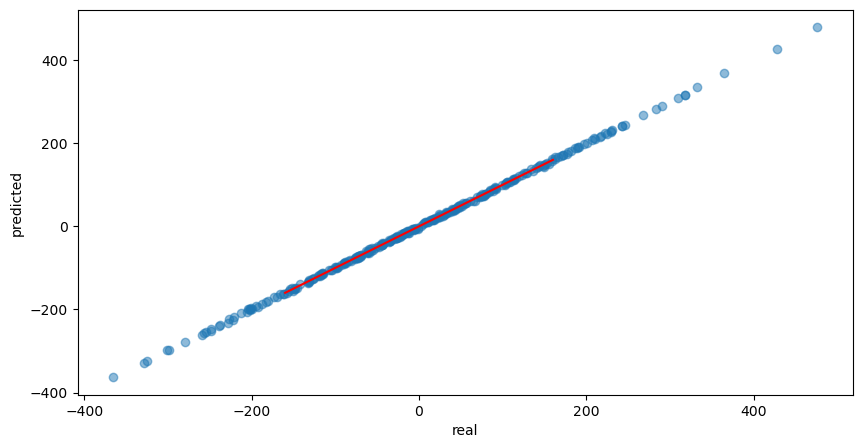

In [37]:
data = pd.read_csv('data_part1.csv') # відкриваю згенерований у другій лабі датасет

# Перегляд перших декількох рядків даних
print("_-_-_-_-_Перегляд перших декількох рядків даних_-_-_-_-_")
print(data.head(), "\n")
print("_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_")

X = data.drop('6', axis=1)
y = data['6']

# розбиття даних на тренувальні і тестові
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Створення моделі
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=(6,), activation='linear')
])

# компіляція моделі з оптимізатором sgd -  стандарнтий метод градієнтного спуску та 
# функцією втрат mse
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mse'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))  # Навчання моделі

loss = model.evaluate(X_test, y_test)  # Оцінка результатів

y_pred = model.predict(X_test)  # Прогнозування

mse = mean_squared_error(y_test, y_pred)  # Обчислення середньоквадратичної помилки
mae = mean_absolute_error(y_test, y_pred)  # Обчислення середньоабсолютної помилки
print("MSE:", mse)  # Виведення MSE
print("MAE:", mae)  # Виведення MAE

plt.figure(figsize=(10,5))  # Візуалізація предсказаних та тестових даних
x = np.linspace(-160, 160)
plt.plot(x, x, label='y = x', color = "red")
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('real')
plt.ylabel('predicted')
plt.show()

Дані похибок з лаби №2:
MSE: 2957.4663981944905
MAE: 0.780794003953149

Наші дані похибок:
MSE: 4.288789006418088
MAE: 1.6415912306413327

Як бачимо, значення MSE (середня квадратична) зменшилося у 689 (!) разів, що свідчить про більш точне прогнозування значень.

7/7 [==============================] - 0s 4ms/step
Точність в цілому: 0.93
Відгук: 0.98
F1 значення: 0.92
AUC-ROC: 0.93


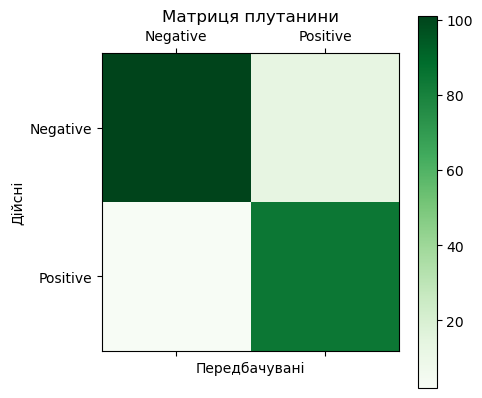

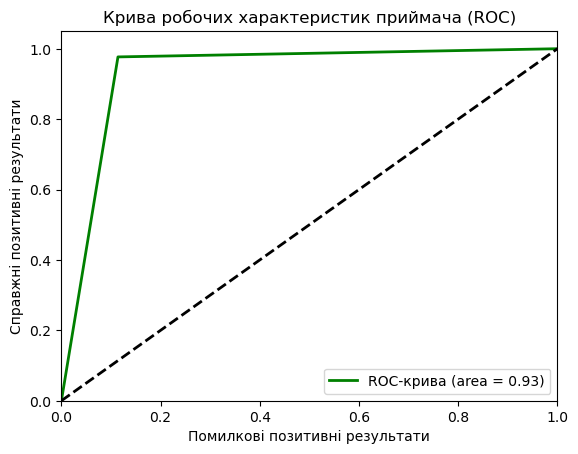

In [23]:
#набір для бінарної класифікації з 3 лаби
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_classes=2,
    n_clusters_per_class=1,
    n_redundant=0,
    random_state=19
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  # Розбиття даних на тренувальний та тестовий набори

model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')  #  другий шар з 1 нейроном та активацією sigmoid для бінарної класифікації
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Навчання моделі
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)

# Прогнозування
y_pred_non_binary = model.predict(X_test)
y_pred = (y_pred_non_binary > 0.5).astype(int)

# Оцінка результатів на тестових даних
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Точність в цілому: {accuracy:.2f}')

# Оцінка деяких метрик
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Відгук: {recall:.2f}')
print(f'F1 значення: {f1:.2f}')
print(f'AUC-ROC: {roc_auc:.2f}')

# Візуалізація матриці плутанини
confusion = confusion_matrix(y_test, y_pred)
plt.matshow(confusion, cmap=plt.cm.Greens)
plt.colorbar()
plt.xlabel('Передбачувані')
plt.ylabel('Дійсні')
plt.title('Матриця плутанини')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])
plt.show()

# Візуалізація ROC-кривої
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='g', lw=2, label='ROC-крива (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Помилкові позитивні результати')
plt.ylabel('Справжні позитивні результати')
plt.title('Крива робочих характеристик приймача (ROC)')
plt.legend(loc='lower right')
plt.show()

Як бачимо, результати теж хороші. 